In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import v_measure_score, accuracy_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#Function to build the classification model and evaluate the accuracy
def evaluate_classification_model(X,y,k):
  X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=20)
  model_class = KNeighborsClassifier(n_neighbors=k, weights = "distance")
  model_class.fit(X_train, y_train)
  yhat_train = model_class.predict(X_train)
  yhat_test = model_class.predict(X_test)
  accuracy = accuracy_score(y_test, yhat_test)
  return accuracy

In [ ]:
#function for Backward elimination
def backward_elimination(X,y,k):
  accuracy_list_test=[]
  for i in range(len(X.columns)):
    X_temp =X.drop(X.columns[i], axis=1)
    accuracy_test = evaluate_classification_model(X_temp,y,k)
    accuracy_list_test.append((accuracy_test,i))
  return accuracy_list_test

In [ ]:
#read the data set and assign it to a data frame
data = pd.read_csv("#2231271.csv")
#replace 0 and empty spaces with NaN except the column "Outcome"
columns_to_replace = ["Pregnancies", "Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]
data[columns_to_replace] = data[columns_to_replace].replace({" ":np.nan, 0:np.nan})

In [ ]:
#dealing with the missing values:
#if there are 4 or more of missing values in a row-->eliminate row
#if there are more than 40% of missing values in a column -->eliminate column
#For others cases: replace with the median

#Calculate limit for missing values in columns
column_limit = len(data) * 0.6

#Drop rows with 4 or more missing values
cleaned_data = data.dropna(thresh=len(data.columns) - 3)

# Eliminate columns with more than 40% missing values
cleaned_data = cleaned_data.dropna(axis=1, thresh=column_limit)

# Replace missing values in remaining columns with median
for column in cleaned_data.columns:
  median = cleaned_data[column].median()
  cleaned_data[column].fillna(median, inplace=True)

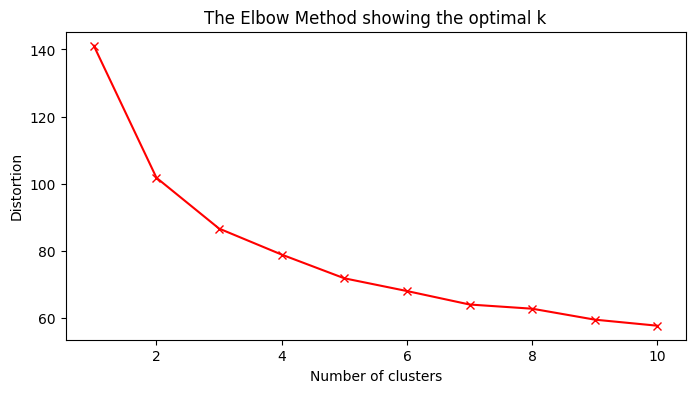

In [ ]:
#Clustering and preprocesing
#Assign the inputs to a variable x and normalize the data
X = cleaned_data.drop(columns=["Outcome"])
X = (X - X.min()) / (X.max() - X.min())
y = cleaned_data["Outcome"]

#create the number of clusters:
K = range(1,11)

#create an empty list where we'll store the wcss calculated for each cluster
wcss_list = []

#create the loop to the different numbers of clusters
for k in K:
  kmeans = KMeans(n_clusters = k, random_state=20, n_init="auto")
  kmeans.fit(X)
  #calculate WCSS and add to the list "wcss_list"
  wcss_list.append(kmeans.inertia_)

#visualize the elbow method
#size of the graphic
plt.figure(figsize=(8,4))
#x, y and color and lines to the graphic(bx-)
plt.plot(K,wcss_list,'rx-')
plt.xlabel("Number of clusters")
plt.ylabel("Distortion")
plt.title("The Elbow Method showing the optimal k")
plt.show()

In [ ]:
wcss_list

[141.10612673475572,
 101.73278955907853,
 86.57658608961864,
 78.81686002758146,
 71.75061193799829,
 67.95051388795383,
 63.933537550404765,
 62.68369637868122,
 59.41842120923067,
 57.60989961064186]

In [ ]:
#Calculate the labels with kmeans clustering k=2
model = KMeans(n_clusters=2, random_state=20, n_init="auto")
model.fit(X)
# Get the cluster labels for each data point
labels_with_k2 = model.labels_
model2 = KMeans(n_clusters=3, random_state=20, n_init="auto")
model2.fit(X)
# Get the cluster labels for each data point
labels_with_k3 = model2.labels_

#evaluate the clusters
print("The v-measure for 2 clusters is:" )
print(v_measure_score(cleaned_data["Outcome"], labels_with_k2))

print("The v-measure for 3 clusters is:" )
print(v_measure_score(cleaned_data["Outcome"], labels_with_k3))

The v-measure for 2 clusters is:
0.04953495198856598
The v-measure for 3 clusters is:
0.11210945760159044


In [ ]:
#evaluate the classification model withouth adding any column
print("The accuracy of the classification model without adding any column is:")
evaluate_classification_model(X,y,3)

The accuracy of the classification model without adding any column is:


0.7518248175182481

In [ ]:
#add the labels with k=3 to the data
X2=X.copy()
X2["Cluster_Labels"] = labels_with_k3
print("The accuracy of the classification model adding the labels for three clusters is:")
evaluate_classification_model(X2,y,3)

The accuracy of the classification model adding the labels for three clusters is:


0.7518248175182481

In [ ]:
#experimenting: add the labels with k=2 and k=3 clusters to the data
X3=X2.copy()
X3["Cluster_Labels_2"] = labels_with_k2
print("The accuracy of the classification model adding the labels for two and three clusters is:")
evaluate_classification_model(X3,y,3)

The accuracy of the classification model adding the labels for two and three clusters is:


0.7299270072992701

In [ ]:
backward_elimination(X,y,3)

[(0.7226277372262774, 0),
 (0.6642335766423357, 1),
 (0.7445255474452555, 2),
 (0.7226277372262774, 3),
 (0.7737226277372263, 4),
 (0.7664233576642335, 5),
 (0.708029197080292, 6)]

In [ ]:
backward_elimination(X2,y,3)

[(0.7299270072992701, 0),
 (0.6861313868613139, 1),
 (0.7664233576642335, 2),
 (0.7153284671532847, 3),
 (0.7883211678832117, 4),
 (0.7445255474452555, 5),
 (0.6788321167883211, 6),
 (0.7518248175182481, 7)]

In [ ]:
#evaluate the classification model without the column 4
X4 = X.drop(columns=["BMI"])
X4_train, X4_test, y_train, y_test = train_test_split(X4,y, test_size = 0.2, random_state=20)
model_class_final = KNeighborsClassifier(n_neighbors=3, weights = "distance")
model_class_final.fit(X4_train, y_train)
yhat_train = model_class_final.predict(X4_train)
yhat_test = model_class_final.predict(X4_test)

#Use recall score
recall_test_each_class = recall_score(y_test, yhat_test, average=None)
print("Recall for each class of test data: ")
print(recall_test_each_class)

recall_test_macro = recall_score(y_test, yhat_test, average="macro")
print("Recall - macro: ")
print(recall_test_macro)

recall_test_weighted = recall_score(y_test, yhat_test, average="weighted")
print("Recall - weighted: ")
print(recall_test_weighted)

#F1 Score
f1_score_test_each_class = f1_score(y_test, yhat_test, average=None)
print("F1 score for each class of test data: ")
print(f1_score_test_each_class)

f1_score_test_macro = f1_score(y_test, yhat_test, average="macro")
print("F1 Score - macro: ")
print(f1_score_test_macro)

f1_score_test_weighted = f1_score(y_test, yhat_test, average="weighted")
print("F1 Score - weighted: ")
print(f1_score_test_weighted)

Recall for each class of test data: 
[0.84466019 0.55882353]
Recall - macro: 
0.7017418617932609
Recall - weighted: 
0.7737226277372263
F1 score for each class of test data: 
[0.84878049 0.55072464]
F1 Score - macro: 
0.6997525627430187
F1 Score - weighted: 
0.7748104228106705
